<a href="https://colab.research.google.com/github/Rakesh2711/Deloitte-Exam/blob/master/Rakesh_kumar_singh_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,GroupKFold 
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRFRegressor
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics, preprocessing, model_selection
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['font.family'] = "DejaVu Sans"


import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from tqdm import tqdm_notebook
# from urlextract import URLExtract
# import geopandas

import warnings
warnings.filterwarnings("ignore")
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [0]:
os.chdir('/content/drive/My Drive/Deloitte data')

In [0]:
train=pd.read_csv('train10k.csv')
test=pd.read_csv('test2k.csv')
submission=pd.read_csv('sample_submission2k.csv')

# Baseline Model with dropping all the columns which have missing values

In [100]:
submission.head()

,id,log_price
0,20655777,1
1,13725995,1
2,20523808,1
3,629855,1
4,747605,1


In [101]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.000000e+04,10000.000000,10000.00000,9974.000000,10000.000000,10000.000000,10000.000000,7714.000000,9986.000000,9977.000000
mean,1.121862e+07,4.790830,3.14660,1.240525,38.426223,-92.481286,20.532900,94.106041,1.261065,1.705823
std,6.086583e+06,0.719634,2.15573,0.590796,3.078567,21.710604,36.447603,7.929820,0.846945,1.215609
min,3.362000e+03,1.609438,1.00000,0.000000,33.343287,-122.510940,0.000000,20.000000,0.000000,1.000000
25%,6.185343e+06,4.317488,2.00000,1.000000,34.127979,-118.343094,1.000000,92.000000,1.000000,1.000000
50%,1.220670e+07,4.744932,2.00000,1.000000,40.659715,-77.001433,6.000000,96.000000,1.000000,1.000000
75%,1.635534e+07,5.220356,4.00000,1.000000,40.745598,-73.954729,23.000000,100.000000,1.000000,2.000000
max,2.120388e+07,7.569412,16.00000,8.000000,42.390437,-70.985047,530.000000,100.000000,8.000000,16.000000


In [102]:
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [0]:
for col in train.columns:
    print(col)
    print('\n')
    print(train[col].value_counts())

In [104]:
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [105]:
train.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   26
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              2171
host_has_profile_pic        21
host_identity_verified      21
host_response_rate        2509
host_since                  21
instant_bookable             0
last_review               2167
latitude                     0
longitude                    0
name                         0
neighbourhood              939
number_of_reviews            0
review_scores_rating      2286
thumbnail_url             1104
zipcode                    130
bedrooms                    14
beds                        23
dtype: int64

In [106]:
test.isna().sum()

id                          0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   7
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review              408
host_has_profile_pic        4
host_identity_verified      4
host_response_rate        509
host_since                  4
instant_bookable            0
last_review               407
latitude                    0
longitude                   0
name                        1
neighbourhood             191
number_of_reviews           0
review_scores_rating      426
thumbnail_url             236
zipcode                    27
bedrooms                    2
beds                        2
dtype: int64

In [0]:
train.dropna(axis=1,inplace = True)
test.dropna(axis =1 ,inplace = True)

In [108]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'city', 'description', 'instant_bookable', 'latitude', 'longitude',
       'name', 'number_of_reviews'],
      dtype='object')

In [109]:
test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'instant_bookable', 'latitude', 'longitude',
       'number_of_reviews'],
      dtype='object')

In [110]:
train.shape ,test.shape

((10000, 16), (2000, 14))

In [111]:
for col in train.columns:
    print(col)

id
log_price
property_type
room_type
amenities
accommodates
bed_type
cancellation_policy
cleaning_fee
city
description
instant_bookable
latitude
longitude
name
number_of_reviews


In [112]:
for col in test.columns:
    print(col)

id
property_type
room_type
amenities
accommodates
bed_type
cancellation_policy
cleaning_fee
city
description
instant_bookable
latitude
longitude
number_of_reviews


In [0]:
train.drop('name',axis =1 ,inplace=True)

In [114]:
train.shape ,test.shape

((10000, 15), (2000, 14))

In [115]:

train.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,Real Bed,flexible,False,NYC,Large apartment with a lot of natural light ne...,t,40.859270,-73.929658,0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,flexible,True,NYC,This is a true one-bedroom apartment in the be...,f,40.738295,-74.006016,0


In [116]:
test.head(2)

,id,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews
0,6375849,Bungalow,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,Real Bed,strict,True,LA,"Centrally located, this warm and inviting back...",f,34.041205,-118.375735,2
1,4188426,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,strict,True,LA,Hidden up in the hills of Silverlake and Echo ...,f,34.085591,-118.264554,74


In [0]:
test['data'] = 'test'
train['data'] = 'train'
test['log_price'] = np.nan

In [0]:
df = pd.concat([train,test[train.columns]],axis=0)

In [119]:
df.head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews,data
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,Real Bed,flexible,False,NYC,Large apartment with a lot of natural light ne...,t,40.859270,-73.929658,0,train
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,flexible,True,NYC,This is a true one-bedroom apartment in the be...,f,40.738295,-74.006016,0,train
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,Real Bed,moderate,True,NYC,My place is close to Prospect Park and Phat Al...,f,40.662847,-73.946532,0,train


In [120]:
df.select_dtypes('object').columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'instant_bookable',
       'data'],
      dtype='object')

In [69]:
# test.select_dtypes('object').columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'instant_bookable'],
      dtype='object')

In [0]:
dummies = pd.get_dummies(df[['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'instant_bookable']])

df = pd.concat([df,dummies],axis=1)

df.head()

df.drop(['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'description', 'instant_bookable','amenities'],axis = 1,inplace = True)

In [122]:
df.head(2)

,id,log_price,accommodates,cleaning_fee,latitude,longitude,number_of_reviews,data,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,False,40.859270,-73.929658,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,12343026,5.010635,2,True,40.738295,-74.006016,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
# dummies = pd.get_dummies(test[['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'instant_bookable']])

# test = pd.concat([test,dummies],axis=1)

# test.head()

# test.drop(['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'description', 'instant_bookable','amenities'],axis = 1,inplace = True)

In [41]:
test.columns

Index(['id', 'accommodates', 'cleaning_fee', 'latitude', 'longitude',
       'number_of_reviews', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Villa', 'property_type_Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellati

In [0]:
# train['cleaning_fee'] = train['cleaning_fee'].astype('int')

df['cleaning_fee'] = df['cleaning_fee'].astype('int')

In [125]:
df.head(2)

,id,log_price,accommodates,cleaning_fee,latitude,longitude,number_of_reviews,data,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,0,40.859270,-73.929658,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,12343026,5.010635,2,1,40.738295,-74.006016,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0


In [73]:
train.shape,test.shape

((10000, 56), (2000, 47))

In [0]:
train = df[df['data'] == 'train']

test = df[df['data'] == 'test']


In [140]:
train.shape , test.shape

((10000, 58), (2000, 58))

In [0]:
train.drop('data',axis=1 ,inplace=True)
test.drop('data',axis=1 ,inplace=True)

# EDA

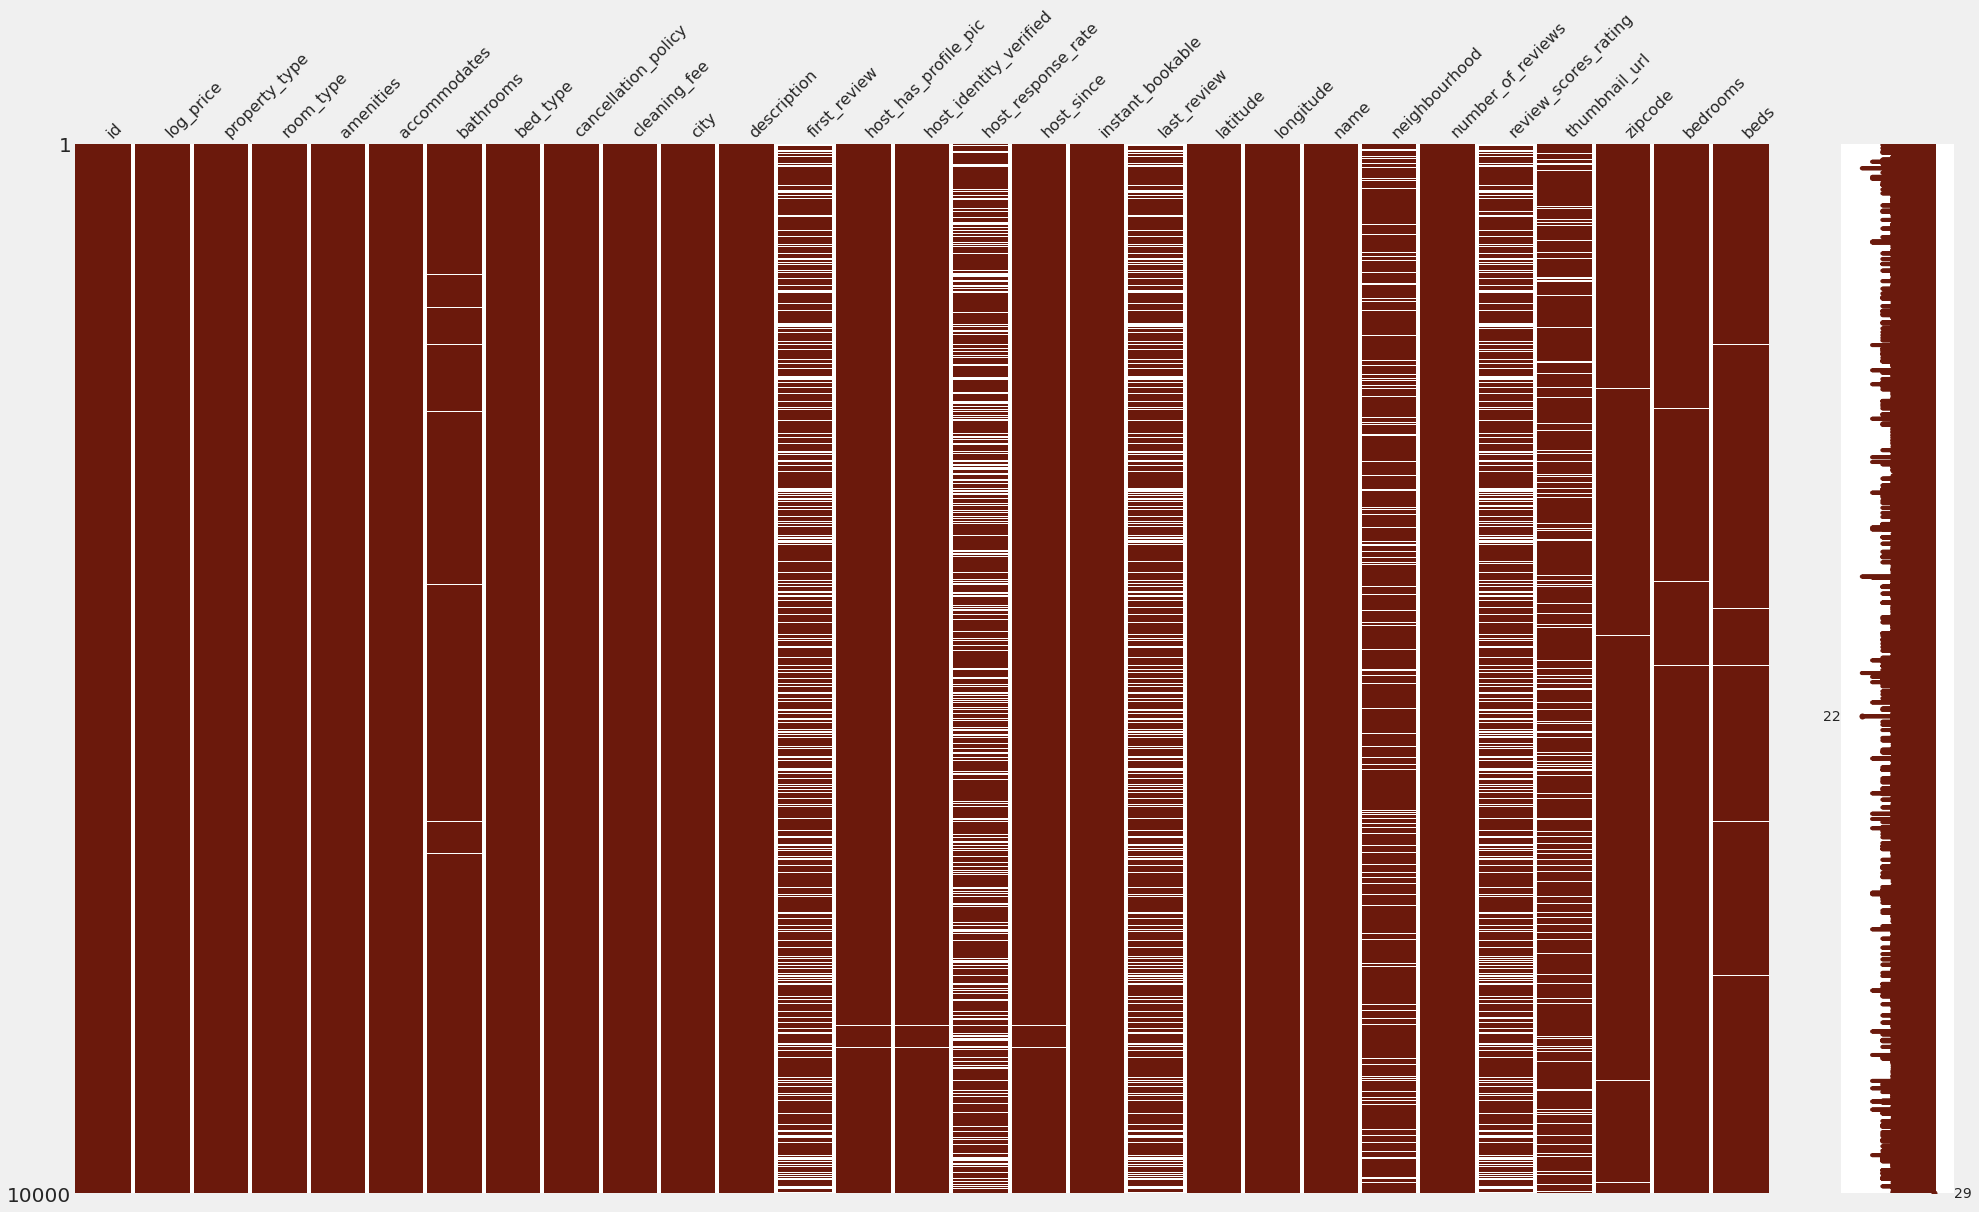

In [25]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(train, figsize=(30, 18), color=(0.42, 0.1, 0.05))
plt.show()

In [26]:
train.groupby(['city','cleaning_fee'])['log_price'].describe()

count      mean       std  ...       50%       75%       max
city    cleaning_fee                              ...                              
Boston  False         99.0    4.728284  0.773228  ...  4.605170  5.298317  6.770789
        True          357.0   4.919911  0.657933  ...  5.010635  5.293305  7.130899
Chicago False         115.0   4.533783  0.734358  ...  4.488636  4.844063  7.090077
        True          383.0   4.727016  0.670417  ...  4.700480  5.135798  7.025538
DC      False         265.0   5.115952  0.937765  ...  4.867534  5.855072  7.467371
        True          535.0   4.995196  0.743426  ...  4.897840  5.298317  7.467371
LA      False         695.0   4.489154  0.734986  ...  4.394449  4.828314  7.546974
        True          2354.0  4.788410  0.723517  ...  4.744932  5.181784  7.569412
NYC     False         1283.0  4.562309  0.661815  ...  4.499810  5.007291  7.438384
        True          3048.0  4.782535  0.652260  ...  4.787492  5.192957  7.313220
SF      False         231.0   5.187939  0.804563  ...  5.075174  5.631109  7.313220
        True          635.0   5.201409  0.630310  ...  5.187386  5.616771  7.374629

[12 rows x 8 columns]

In [27]:
pd.set_option('display.max_colwidth', 10)
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire...,"{""Wire...",3,1.0,Real Bed,flexible,False,NYC,Large ...,NaN,t,t,NaN,2011-1...,t,NaN,40.859270,-73.929658,Spacio...,Washin...,0,NaN,https:...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire...,"{TV,""C...",2,1.0,Real Bed,flexible,True,NYC,This i...,NaN,t,t,NaN,2013-1...,f,NaN,40.738295,-74.006016,Lovely...,West V...,0,NaN,https:...,10014,1.0,1.0
2,9493786,4.077537,House,Privat...,"{""Wire...",3,1.5,Real Bed,moderate,True,NYC,My pla...,NaN,f,f,0%,2016-0...,f,NaN,40.662847,-73.946532,2. Pri...,East F...,0,NaN,https:...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire...,"{""Cabl...",1,1.0,Real Bed,flexible,False,NYC,Upper ...,NaN,t,f,NaN,2015-0...,f,NaN,40.796835,-73.970703,Upper ...,Upper ...,0,NaN,https:...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire...,"{TV,Po...",3,1.0,Real Bed,strict,True,SF,"1 bed,...",2015-0...,t,t,NaN,2015-0...,f,2015-1...,37.782340,-122.39...,GREAT ...,SoMa,4,90.0,https:...,94107,1.0,1.0


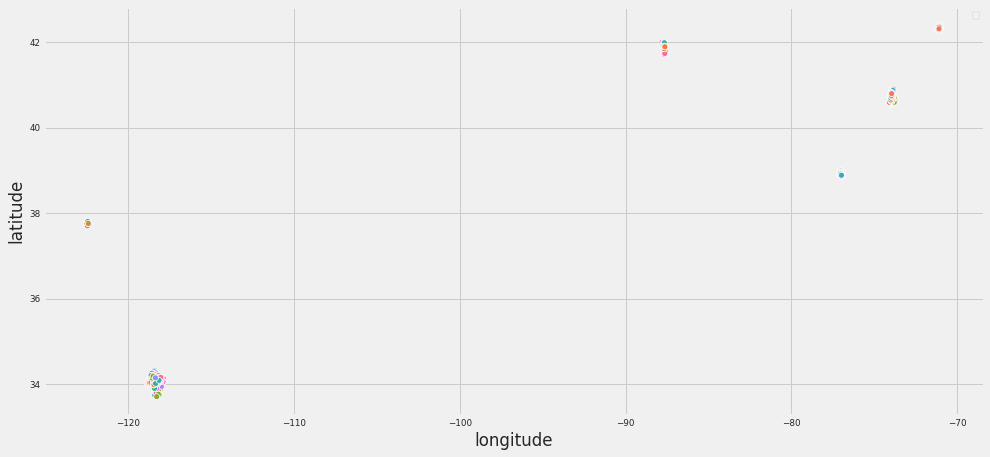

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=train['latitude'],x=train['longitude'],hue=train['neighbourhood'])
plt.legend('')
plt.show()

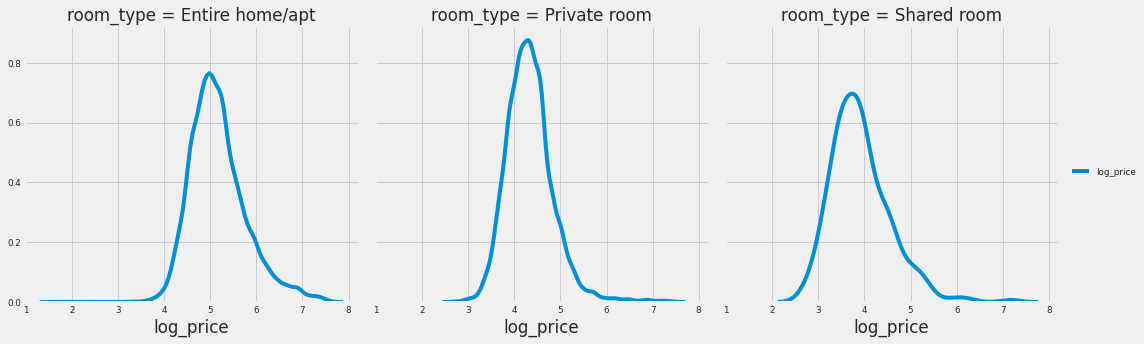

In [29]:
sns.FacetGrid(train,col='room_type',height = 5).map(sns.kdeplot,'log_price').add_legend()
plt.show()

In [0]:
train['host_response_rate'] = (train['host_response_rate'].str.replace('%','')).astype('float')

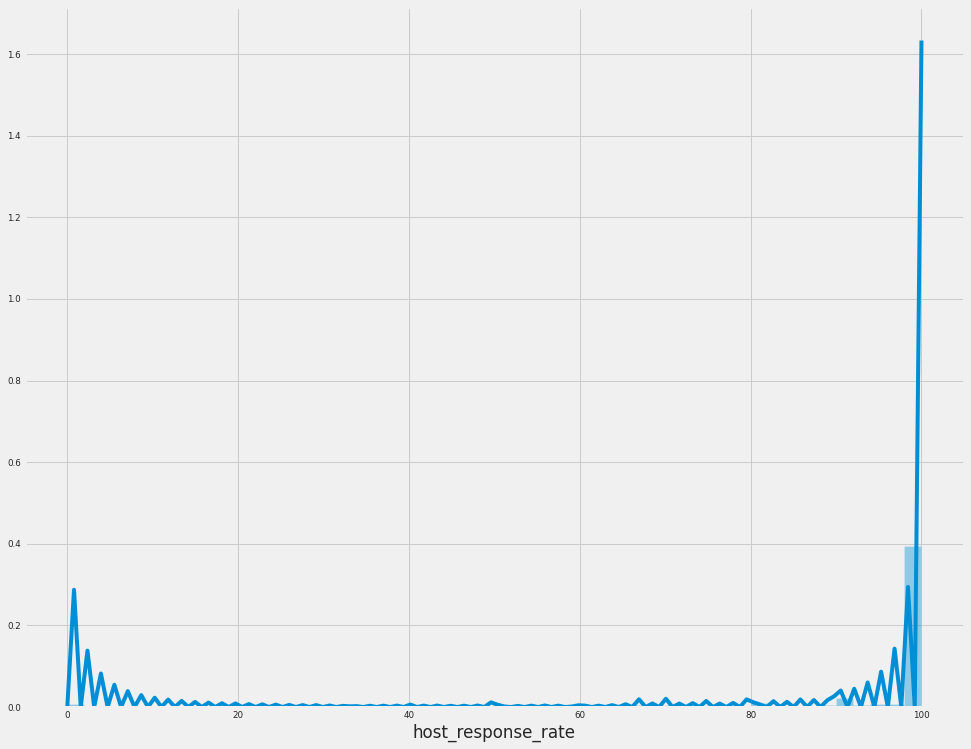

In [31]:
sns.distplot(train['host_response_rate'],kde=True,)
plt.show()

In [32]:
pd.set_option('display.max_colwidth', 0)
train[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).T

,unique
property_type,"[Apartment, House, Timeshare, Villa, Condominium, Townhouse, Loft, Serviced apartment, Bungalow, Boutique hotel, Guest suite, Other, Guesthouse, Bed & Breakfast, Camper/RV, Castle, Cabin, Hostel, Boat, Tipi, Dorm, Tent, Chalet, In-law, Cave, Earth House, Vacation home, Treehouse]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[flexible, moderate, strict, super_strict_30, super_strict_60]"
cleaning_fee,"[False, True]"
city,"[NYC, SF, LA, DC, Boston, Chicago]"
host_has_profile_pic,"[t, f, nan]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 0.0, 100.0, 99.0, 91.0, 80.0, 98.0, 63.0, 60.0, 90.0, 83.0, 89.0, 10.0, 66.0, 81.0, 85.0, 95.0, 94.0, 96.0, 38.0, 93.0, 86.0, 97.0, 67.0, 50.0, 75.0, 77.0, 58.0, 74.0, 88.0, 25.0, 71.0, 20.0, 92.0, 82.0, 70.0, 33.0, 14.0, 64.0, 44.0, 79.0, 54.0, 23.0, 69.0, 76.0, 78.0, 73.0, 84.0, 29.0, 57.0, 56.0, 52.0, 65.0, 43.0, 87.0, 30.0, 40.0, 72.0, 17.0, 47.0, 68.0, 62.0, 55.0, 26.0, 61.0, 53.0, 27.0]"
instant_bookable,"[t, f]"


city
Boston     4.878308
Chicago    4.682394
DC         5.035197
LA         4.720197
NYC        4.717296
SF         5.197816
Name: log_price, dtype: float64




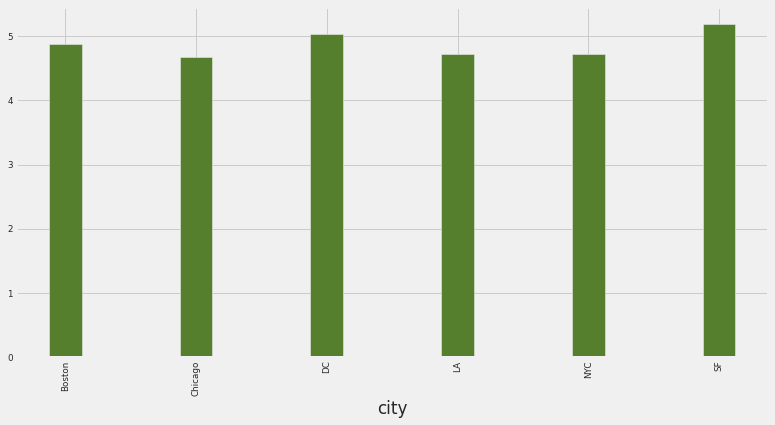

In [33]:
# SF has the highest mean price

print(train.groupby(['city'])['log_price'].mean())
print('\n')
train.groupby(['city'])['log_price'].mean().plot(kind='bar',color = '#557f2d',figsize=(12,6),width=0.25)
plt.show()

room_type
Entire home/apt    5.174810
Private room       4.336024
Shared room        3.912781
Name: log_price, dtype: float64




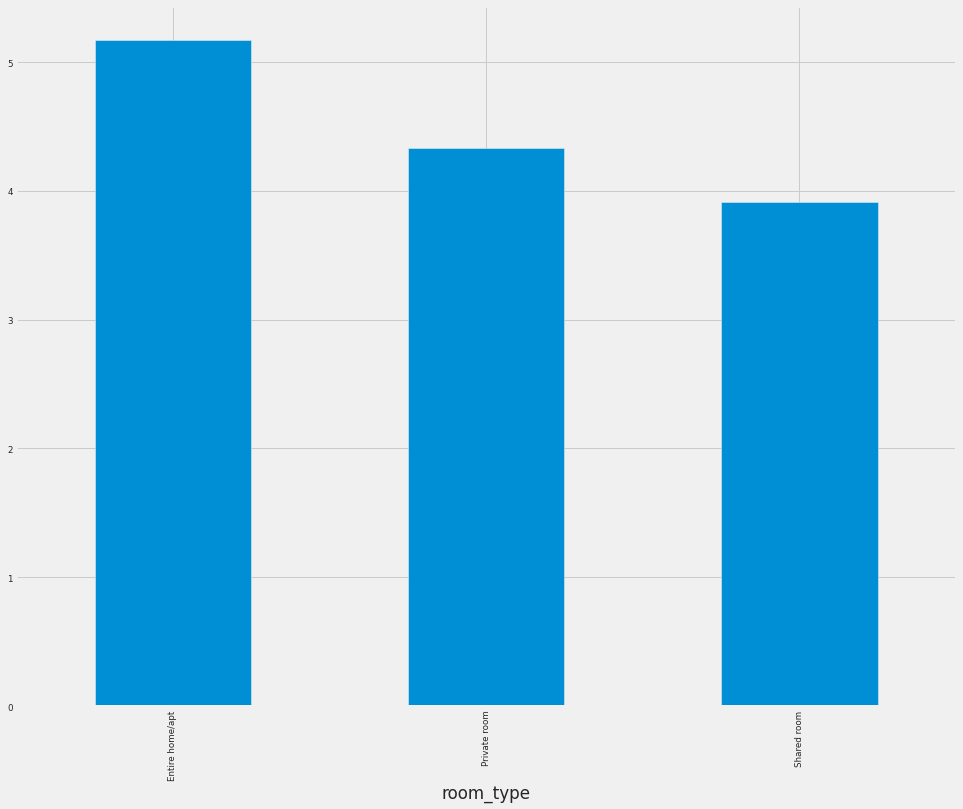

In [34]:
# We can see Entire home/apt is more costiler than private room and shared room
print(train.groupby(['room_type'])['log_price'].mean())
print('\n')
train.groupby(['room_type'])['log_price'].mean().plot(kind = 'bar')
plt.show()

property_type
Apartment             4.767573
Bed & Breakfast       4.528958
Boat                  5.665308
Boutique hotel        4.799852
Bungalow              4.745602
Cabin                 4.929558
Camper/RV             4.778741
Castle                5.991465
Cave                  4.990433
Chalet                4.343805
Condominium           5.062759
Dorm                  3.787140
Earth House           4.442651
Guest suite           4.533088
Guesthouse            4.642296
Hostel                4.014886
House                 4.792040
In-law                4.298726
Loft                  5.023434
Other                 4.941533
Serviced apartment    4.999399
Tent                  5.053214
Timeshare             5.639102
Tipi                  4.465908
Townhouse             4.895080
Treehouse             4.605170
Vacation home         5.578125
Villa                 5.279067
Name: log_price, dtype: float64




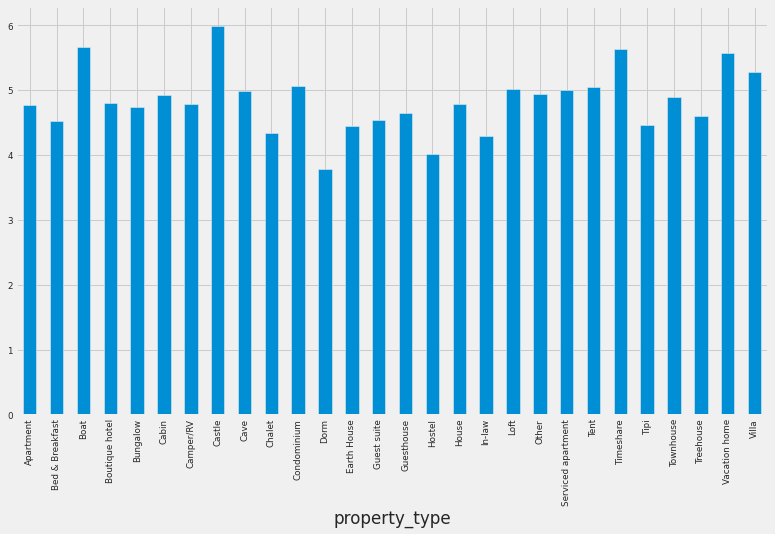

In [35]:
# Casle is the costliest one among all property type
plt.rcParams['figure.figsize'] = 12,7
print(train.groupby(['property_type'])['log_price'].mean())
print('\n')
train.groupby(['property_type'])['log_price'].mean().plot(kind = 'bar')
plt.show()

In [36]:
# Most of the properties are aparament
train['property_type'].value_counts(dropna=False)

Apartment             6604
House                 2217
Condominium           376 
Townhouse             226 
Loft                  166 
Other                 85  
Guesthouse            71  
Bed & Breakfast       60  
Bungalow              57  
Villa                 32  
Guest suite           19  
Dorm                  15  
Cabin                 13  
Camper/RV             12  
Boutique hotel        9   
Hostel                8   
Timeshare             8   
Boat                  5   
In-law                5   
Vacation home         2   
Serviced apartment    2   
Tent                  2   
Earth House           1   
Castle                1   
Treehouse             1   
Chalet                1   
Tipi                  1   
Cave                  1   
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Room Type vs log_price')

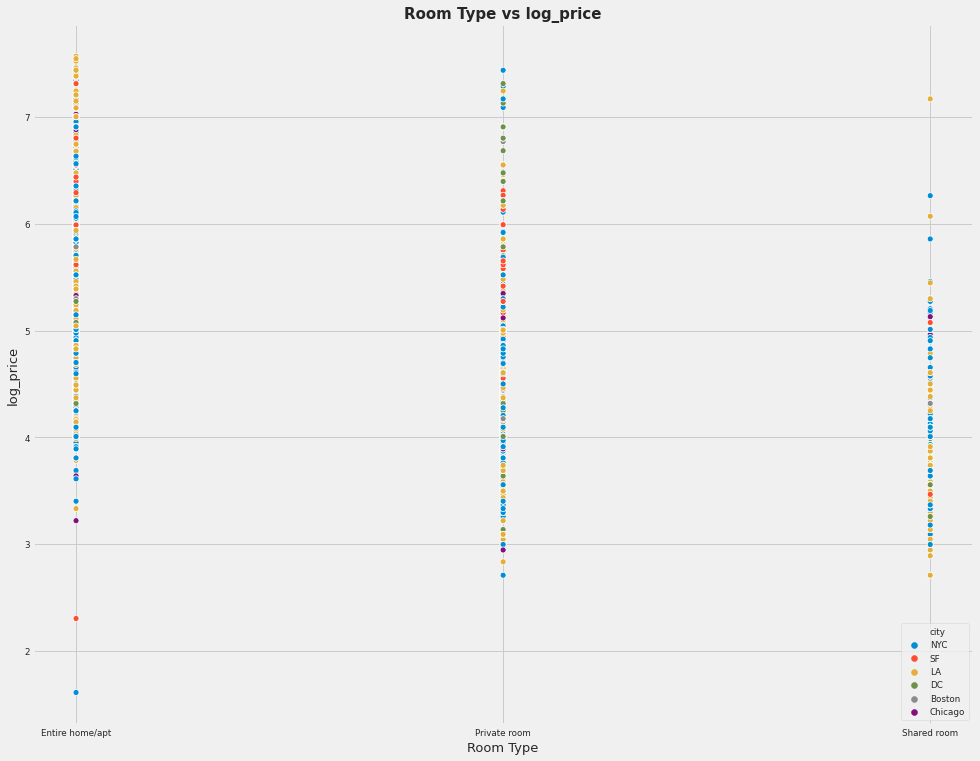

In [37]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='log_price',hue='city', data=train)

plt.xlabel("Room Type", size=13)
plt.ylabel("log_price", size=13)
plt.title("Room Type vs log_price",size=15, weight='bold')

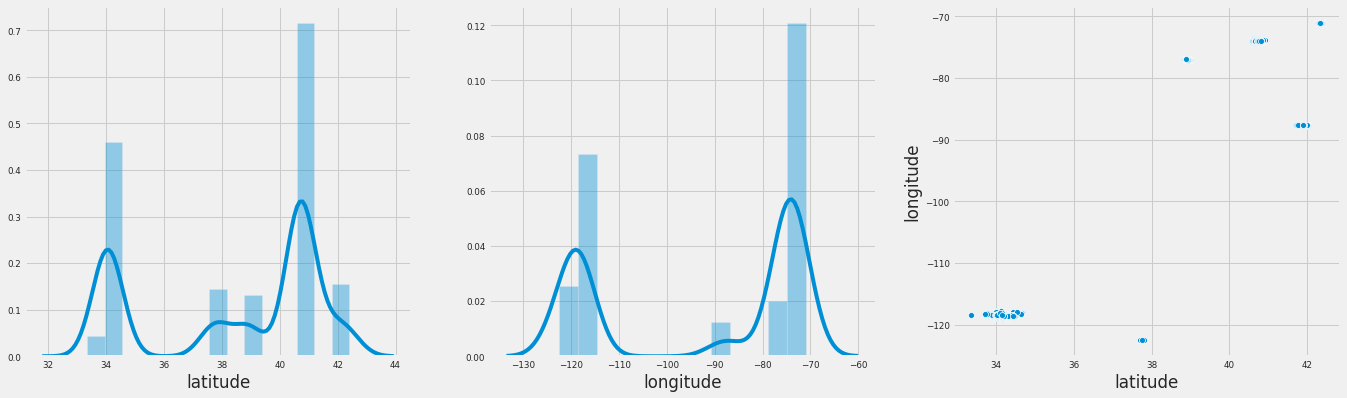

In [38]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(train['latitude'], ax=axes[0])
sns.distplot(train['longitude'], ax=axes[1])
sns.scatterplot(x= train['latitude'], y=train['longitude'])
plt.show()

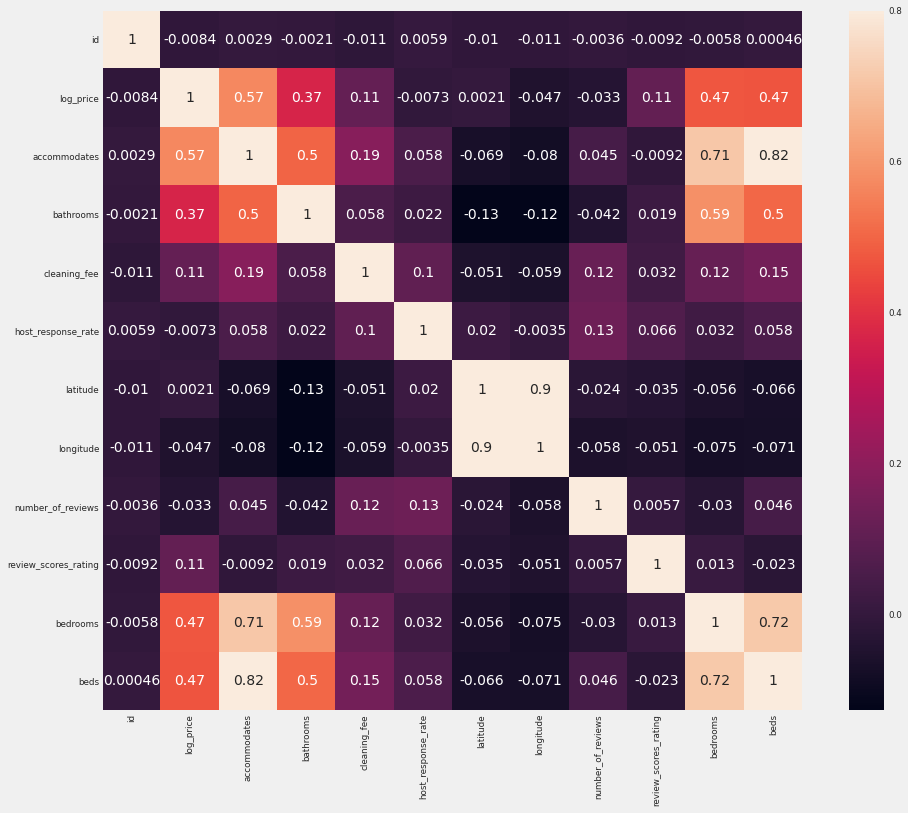

In [39]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = train.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
# we can see latitude and longitude are highly correlated with each other
# we can see bedrooms,beds and accomodates are highly correlated with each other
# f_review year and number of reviews are higly correated

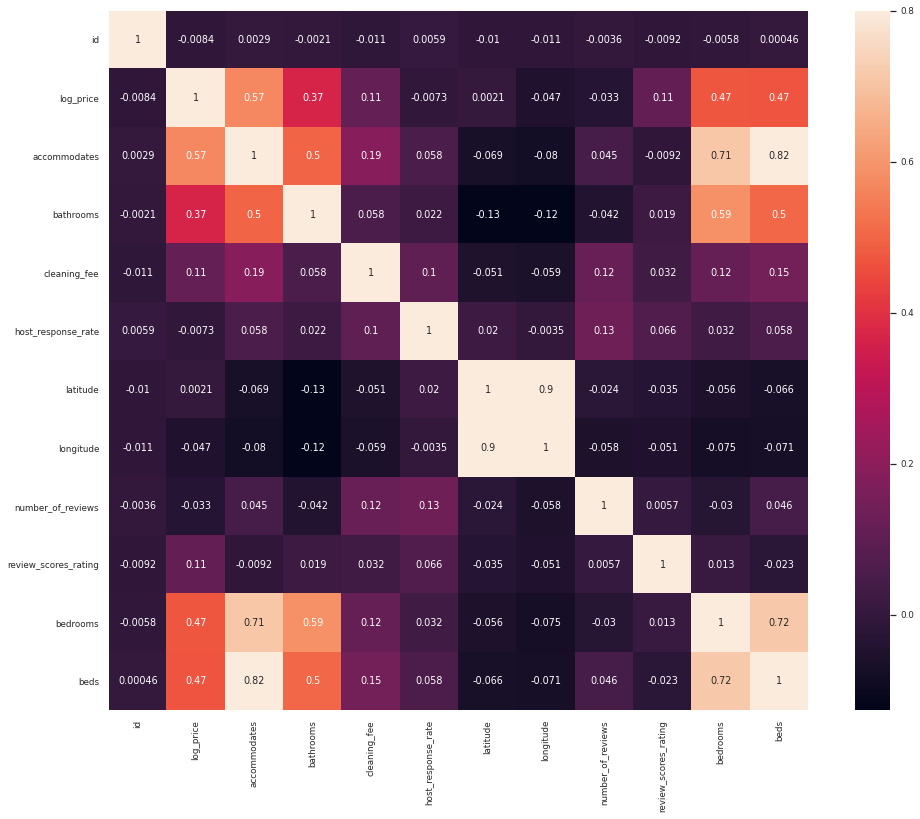

In [40]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = train.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [44]:
train.groupby(['cleaning_fee','beds','bathrooms'])['log_price'].mean()

cleaning_fee  beds  bathrooms
False         1.0   0.0          4.145156
                    0.5          4.076351
                    1.0          4.503498
                    1.5          4.368391
                    2.0          4.399496
                                   ...   
True          12.0  2.5          6.001415
                    3.0          6.395262
              14.0  7.0          6.126869
              16.0  1.0          6.476972
                    5.0          6.678342
Name: log_price, Length: 152, dtype: float64

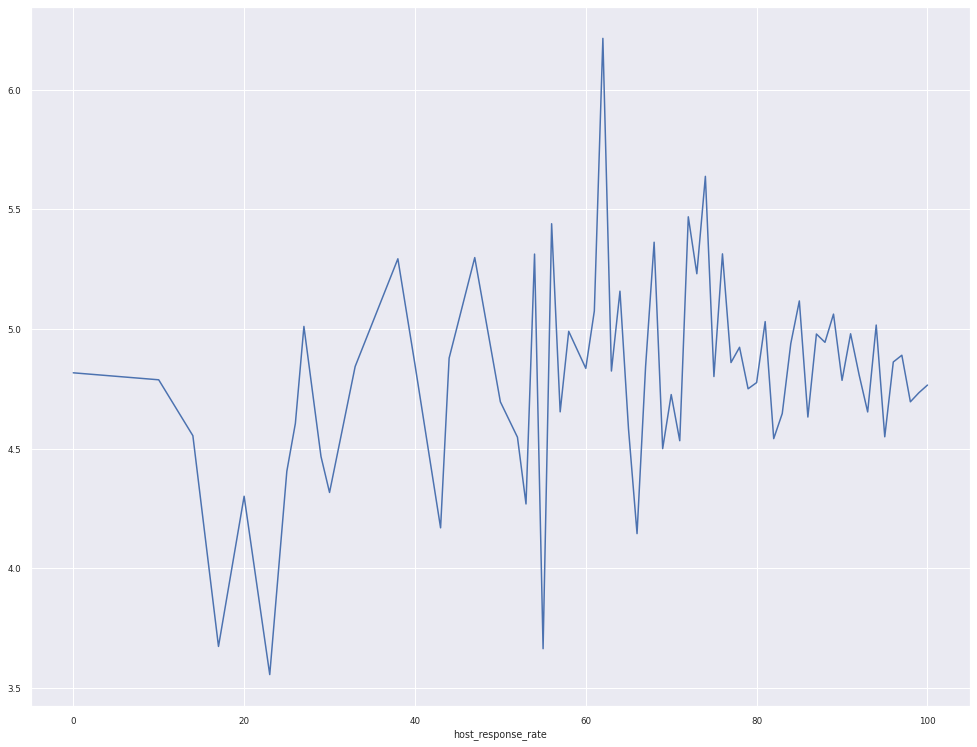

In [47]:
train.groupby('host_response_rate')['log_price'].mean().plot(kind='line')
plt.show()

In [62]:
train.groupby('neighbourhood')['log_price'].mean()


neighbourhood
16th Street Heights    4.754360
Adams Morgan           4.815021
Alamo Square           4.968100
Albany Park            3.829586
Alhambra               4.125904
                         ...   
Woodlawn               4.368475
Woodley Park           4.889321
Woodridge              4.752597
Woodside               4.244208
Wrigleyville           5.240625
Name: log_price, Length: 483, dtype: float64

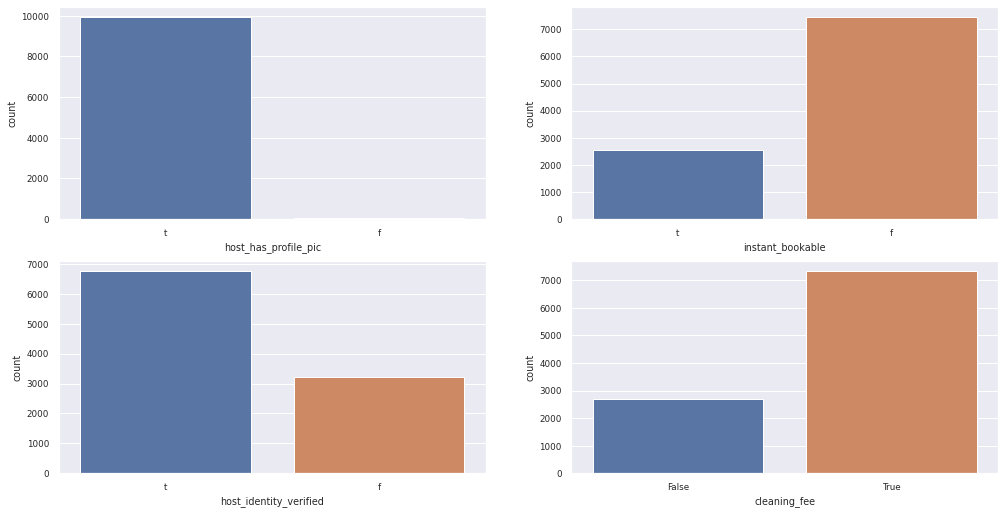

In [64]:
plt.rcParams['figure.figsize'] = 15,8
fig, ax =plt.subplots(2,2)
ax = ax.T.flatten() # To make it one dimensional array the then iterate it though to plot
for col , i in zip(['host_has_profile_pic','host_identity_verified','instant_bookable','cleaning_fee'],range(0,4)):
    sns.countplot(train[col], ax=ax[i])
plt.show()

In [0]:
# Number of amenites in each stay
train['number_of_amenities'] = [len(train['amenities'].str.split(',').values[i]) for i in range(len(train['amenities']))]

# Number of amenites in each stay
test['number_of_amenities'] = [len(test['amenities'].str.split(',').values[i]) for i in range(len(test['amenities']))]

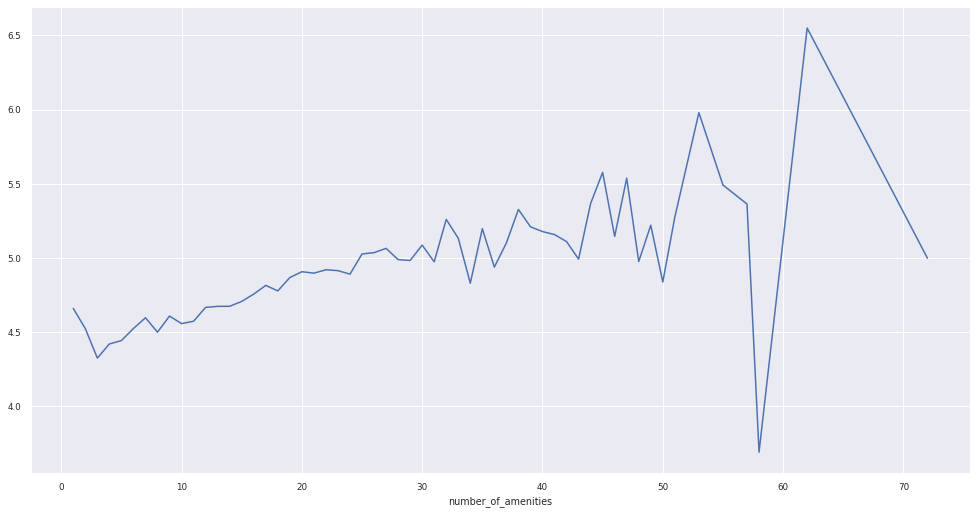

In [67]:
train.groupby('number_of_amenities')['log_price'].mean().plot(kind='line')

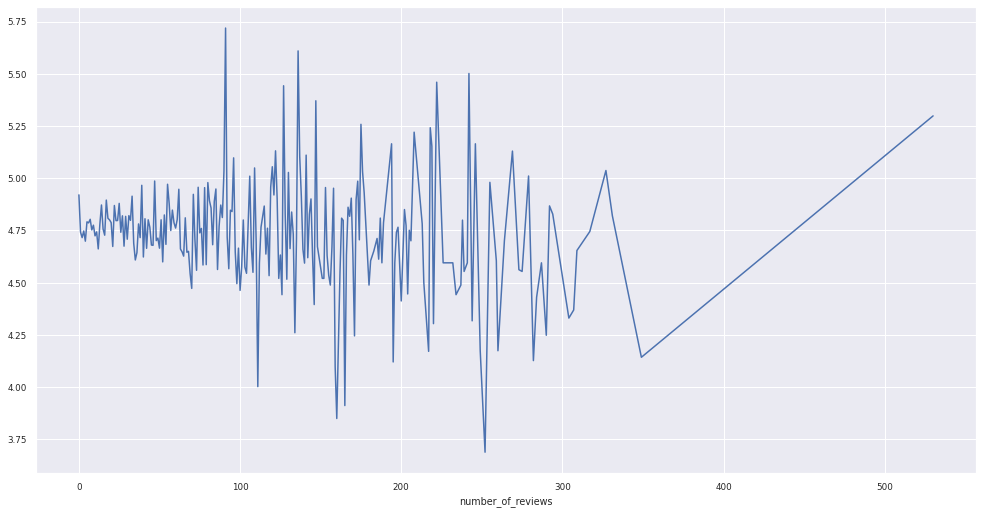

In [69]:
train.groupby('number_of_reviews')['log_price'].mean().plot(kind='line')

In [71]:
train.groupby(['neighbourhood','city'])['log_price'].mean()

neighbourhood        city   
16th Street Heights  DC         4.754360
Adams Morgan         DC         4.815021
Alamo Square         SF         4.968100
Albany Park          Chicago    3.829586
Alhambra             LA         4.125904
                                  ...   
Woodlawn             NYC        4.343805
Woodley Park         DC         4.889321
Woodridge            DC         4.752597
Woodside             NYC        4.244208
Wrigleyville         Chicago    5.240625
Name: log_price, Length: 501, dtype: float64

# EDA2

In [74]:
train.review_scores_rating.nunique()

46

In [75]:
# we cn drop name due to lot of unique values as name.
train[['description','review_scores_rating','amenities']].tail(10)

,description,review_scores_rating,amenities
9990,Lovely lavender colored bedroom with a queen bed and private bathroom. French doors open onto a patio for private entry and exit. Sit outside under the shade of the Chinese elm by the organic garden or under the pergola. 1/2 mile walk to a quaint downtown area and hiking trails.,NaN,"{""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}"
9991,"Cozy, clean, and hip. City views from our rooftop, fresh West Elm linens, free breakfast, and free access to our SmartTV/Spotify accounts. We are a young, fun, respectful, and very clean couple looking to share our space with good people. Free Breakfast! Help yourself to eggs, fruit, and coffee/tea. We have a medium-sized Border Collie mix (he's a sweet and very calm pup) and can accommodate your pet on a per-case basis. Our apartment has 2.5 bedrooms, where my fiancé and I live with our sweet Border Collie mix pup. Your Room: You will have the master bedroom, a large sun-filled room complete with charming exposed brick details and plenty of storage space. You will have a full-sized bed with West Elm sheets, shelving with amenities: fresh towels, Dr. Bronner's soap, games, books, candles, and a bluetooth-enabled speaker. The room is furnished with eclectic pieces we have built ourselves and collectible items from our travels around the world. There are double-curtains on your two larg",100.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron}"
9992,"City & Beach View Studio. Beachy side of town. Beach steps away (towels supplied). French press, 52"" flat screen with Netflix, free street parking, 2 Diners & mini grocer one block away! 30 min from most places in LA! Beach across Street 2min! NEW COUCH! Community Balcony outside front door! Ocean, Beach, City & Harbor View Studio, front, 3rd floor, old age, contemporary feel. 3 flights of stairs to unit. Community Balcony outside front door. Laundry room down the hallway. No keys! The access codes will be provided upon request 24 hours prior to arrival. You will have access to the entire studio. Laundry room is on same floor at the rear of the building. Parking lot at rear of building. *March 20-May 30th our parking lot will be going under renovations so only free street parking at that time.* Walk distance to beach... across street, walk along fence to ramp and then your toes are in the sand! Since there's no keys, you might only see me if I'm dropping off clean laundry. If you ne",93.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}"
9993,"My place is close to the subway (6, E, & M), Central Park, Grand Central, Bloomingdales, The Smith, and Le Pain Quotidien. You’ll love my place because of its beautiful furnishings and homey feel. My place is good for solo adventurers and business travelers.",NaN,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}"
9994,"The Cottage of Lake Balboa is the perfect escape for anyone seeking an LA getaway, offering the utmost privacy. *** Please read The Cottage's description and 'House Rule

In [76]:
train['description'].nunique()

9989

In [0]:
# binary_col = ['host_has_profile_pic','host_identity_verified','instant_bookable']

# for col in binary_col:
#     df[col] = np.where(df[col]=='t',1,0)

# df.cleaning_fee = df.cleaning_fee.astype('int')

In [0]:
# for col in train.columns:
#     print(col)
#     print('\n')
#     print(train[col].value_counts())

In [0]:
# Host Response rate --Removing percetage sign from the data

In [0]:
# df['f_review_month'] = df['first_review'].dt.month

# df['f_review_year'] = df['first_review'].dt.year

# df['f_review_day'] = df['first_review'].dt.day

In [0]:
# df['l_review_month'] = df['last_review'].dt.month

# df['l_review_year'] = df['last_review'].dt.year

# df['l_review_day'] = df['last_review'].dt.day

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   log_price               10000 non-null  float64
 2   property_type           10000 non-null  object 
 3   room_type               10000 non-null  object 
 4   amenities               10000 non-null  object 
 5   accommodates            10000 non-null  int64  
 6   bathrooms               9974 non-null   float64
 7   bed_type                10000 non-null  object 
 8   cancellation_policy     10000 non-null  object 
 9   cleaning_fee            10000 non-null  bool   
 10  city                    10000 non-null  object 
 11  description             10000 non-null  object 
 12  first_review            7829 non-null   object 
 13  host_has_profile_pic    9979 non-null   object 
 14  host_identity_verified  9979 non-null  

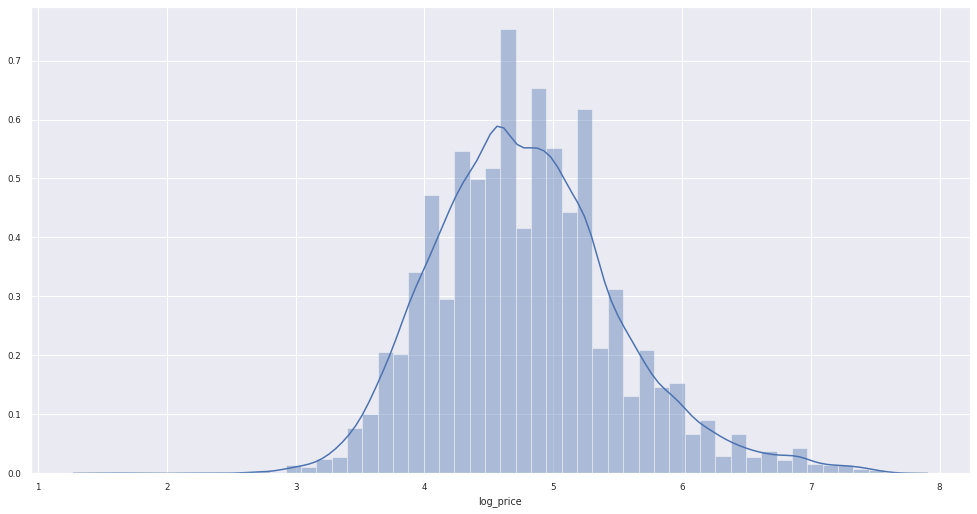

In [83]:
import seaborn as sns
sns.distplot(train['log_price'])

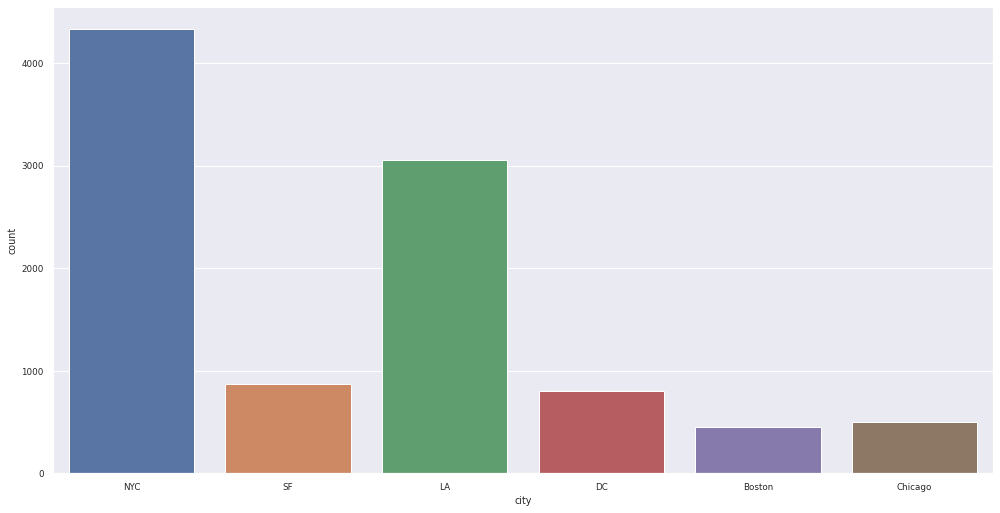

In [86]:
# plt.figure(figsize=(12,7))
sns.countplot(x='city' ,data=train)
plt.show()

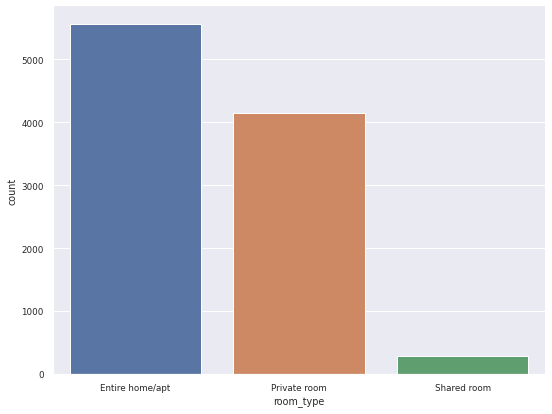

In [88]:
sns.catplot(x='room_type', kind='count' ,data=train)
fig = plt.gcf()
fig.set_size_inches(8, 6)

In [0]:
# # Sepearting catagorical and numerical columns 

# cat_columns = [col for col in df.select_dtypes('object') ]

# num_columns =df.select_dtypes(['float64','int64']).columns

# print(cat_columns)

# print('\n')

# print(num_columns)

In [0]:
# categorical_features_one_hot = pd.get_dummies(df[cat_columns])
# categorical_features_one_hot.head()

In [0]:
# df.drop(cat_columns,axis = 1,inplace = True)

In [0]:
# df=pd.concat([df,categorical_features_one_hot],1)

In [0]:
#  from sklearn.preprocessing import StandardScaler
#  sc = StandardScaler()
#  sc.fit(df.drop(['log_price'],1))
#  sc.transform(df.drop(['log_price'],1))

# Data Preperation 


In [0]:
#### Dropping ---> host_response_rate', 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name'

In [0]:
# # Combine both the dataset for data preprocessing
# test['log_price'] = np.nan
# train['data'] = 'train'
# test['data'] = 'test'
# df = pd.concat([train,test[train.columns]])

In [0]:
# neighbourhood = True---others
# neighbourhood = False ---Mode

# MeanImputation = True---Mean
# MeanImputation = False ---Median

In [0]:
# def DataPreperation(train ,test,col_to_drop = True,neighbourhood = True, MeanImputation = True ,ModeImputation = True):

#     for col in train.columns:
#         if col in ['host_response_rate', 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name']:
#             train.drop(col,axis = 1,inplace=True)
#             test.drop(col,axis = 1,inplace=True)
#         else:pass

#     if neighbourhood:
#         train['neighbourhood'].fillna('others',inplace =True)
#         test['neighbourhood'].fillna('others',inplace =True)
#     else:
#         train['neighbourhood'].fillna(train['neighbourhood'].mode()[0],inplace =True)
#         test['neighbourhood'].fillna(train['neighbourhood'].mode()[0],inplace =True)

#     for col in ['bathrooms','bedrooms','beds','review_scores_rating']:
#         if MeanImputation:
#             ImputeWithMean(train,test,[col])
#         else:
#             ImputeWithMedian(train,test,[col])

#     for col in ['host_has_profile_pic','host_identity_verified']:
#         if ModeImputation:
#             ImputeWithMode(train,test,[col])

#     if train:
#         ConvertTFtoBinary(train,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])
#     if test:
#         ConvertTFtoBinary(test,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])

#     # Combine both the dataset for data preprocessing
#     test['log_price'] = np.nan
#     train['data'] = 'train'
#     test['data'] = 'test'
#     df = pd.concat([train,test[train.columns]])

#     # df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]
    
#     # Dropping amenities ,Description columns from the Data due to lot of unique values
#     df.drop(['amenities','description'],axis=1,inplace=True)

#     cat_var=df.select_dtypes(['object']).columns
#     print(cat_var)

#     CreateDummies(df , cat_var)

#     # Splitting back the training and test set
#     df_train = df[df['data'] =='train']
#     df_test = df[df['data'] =='test']

#     # Dropping data column it was created only to combine the 2-datasets
#     df_train.drop('data',axis = 1,inplace=True)
#     df_test.drop('data',axis = 1,inplace=True)
#     df_test.drop('log_price',axis = 1,inplace=True)

#     df_train, df_val = train_test_split(df_train, test_size = 0.2,random_state=2 ,shuffle = False)

#     x_train=df_train.drop(["log_price","id"],1)
#     y_train=df_train["log_price"]
#     x_test=df_val.drop(["log_price","id"],1)
#     y_test=df_val["log_price"]
    
#     return x_train,y_train,x_test,y_test,df_train,df_test

In [7]:
pd.set_option('display.max_colwidth', 10)
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire...,"{""Wire...",3,1.0,Real Bed,flexible,False,NYC,Large ...,NaN,t,t,NaN,2011-1...,t,NaN,40.859270,-73.929658,Spacio...,Washin...,0,NaN,https:...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire...,"{TV,""C...",2,1.0,Real Bed,flexible,True,NYC,This i...,NaN,t,t,NaN,2013-1...,f,NaN,40.738295,-74.006016,Lovely...,West V...,0,NaN,https:...,10014,1.0,1.0
2,9493786,4.077537,House,Privat...,"{""Wire...",3,1.5,Real Bed,moderate,True,NYC,My pla...,NaN,f,f,0%,2016-0...,f,NaN,40.662847,-73.946532,2. Pri...,East F...,0,NaN,https:...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire...,"{""Cabl...",1,1.0,Real Bed,flexible,False,NYC,Upper ...,NaN,t,f,NaN,2015-0...,f,NaN,40.796835,-73.970703,Upper ...,Upper ...,0,NaN,https:...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire...,"{TV,Po...",3,1.0,Real Bed,strict,True,SF,"1 bed,...",2015-0...,t,t,NaN,2015-0...,f,2015-1...,37.782340,-122.39...,GREAT ...,SoMa,4,90.0,https:...,94107,1.0,1.0


In [8]:
train.shape , test.shape

((10000, 29), (2000, 28))

In [0]:
train['host_response_rate'] = (train['host_response_rate'].str.replace('%','')).astype('float')

test['host_response_rate'] = (test['host_response_rate'].str.replace('%','')).astype('float')

In [0]:
# Dropping Highly correlated columns and not useful columns

train.drop([ 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name','beds','bedrooms','longitude','description','amenities'],axis=1,inplace = True)
test.drop([ 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name','beds','bedrooms','longitude','description','amenities'],axis=1,inplace = True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   log_price               10000 non-null  float64
 2   property_type           10000 non-null  object 
 3   room_type               10000 non-null  object 
 4   accommodates            10000 non-null  int64  
 5   bathrooms               9974 non-null   float64
 6   bed_type                10000 non-null  object 
 7   cancellation_policy     10000 non-null  object 
 8   cleaning_fee            10000 non-null  bool   
 9   city                    10000 non-null  object 
 10  host_has_profile_pic    9979 non-null   object 
 11  host_identity_verified  9979 non-null   object 
 12  host_response_rate      7491 non-null   float64
 13  instant_bookable        10000 non-null  object 
 14  latitude                10000 non-null 

In [12]:
train.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   26
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic        21
host_identity_verified      21
host_response_rate        2509
instant_bookable             0
latitude                     0
neighbourhood              939
number_of_reviews            0
review_scores_rating      2286
dtype: int64

In [13]:
#check for missing data, and output columns that have missing data and number of missing data
for col in train:
    if train[col].isna().sum()>0:
        print(col , train[col].isna().sum())

bathrooms 26
host_has_profile_pic 21
host_identity_verified 21
host_response_rate 2509
neighbourhood 939
review_scores_rating 2286


cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable --->Convert these to binary

In [0]:
def ConvertTFtoBinary(data,col):
    for col1 in col:
        if col1.startswith('cleaning_f'):
            data[col1] = data[col1].astype('int')
        else:
            data[col1] = np.where(data[col1]=='t',1,0)

In [0]:
ConvertTFtoBinary(train,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])

ConvertTFtoBinary(test,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])

In [0]:
def ImputeWithMean(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].mean(),inplace=True)
            test[col1].fillna(train[col1].mean(),inplace=True)

In [0]:
def ImputeWithMedian(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].median(),inplace=True)
            test[col1].fillna(train[col1].median(),inplace=True)

In [0]:
def ImputeWithMode(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].mode()[0],inplace=True)
            test[col1].fillna(train[col1].mode()[0],inplace=True)

In [19]:
train['host_response_rate']

0         NaN
1         NaN
2         0.0
3         NaN
4         NaN
        ...  
9995    100.0
9996    100.0
9997    100.0
9998    100.0
9999    100.0
Name: host_response_rate, Length: 10000, dtype: float64

In [0]:
ImputeWithMean(train,test,['bathrooms','review_scores_rating','host_response_rate'])

ImputeWithMode(train,test,['host_has_profile_pic','host_identity_verified'])

In [0]:
# # Imputing missing values with Other catagory
# train['neighbourhood'].fillna('others',inplace =True)
# test['neighbourhood'].fillna('others',inplace =True)
ImputeWithMode(train,test,['neighbourhood'])

### All missing Values are imputed now

In [22]:
train.isna().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
dtype: int64

### Combine both train and test data

In [23]:
train.shape , test.shape

((10000, 18), (2000, 17))

In [0]:
# Combine both the dataset for data preprocessing
test['log_price'] = np.nan
train['data'] = 'train'
test['data'] = 'test'
df = pd.concat([train,test[train.columns]])

In [0]:
# # Number of amenites in each stay
# %%time
# df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]

### Dummie variable creation

In [0]:
# Creating dummies for catagorical variables
def CreateDummies(data,cat_var):
    for col in cat_var[:-1]:
        freqs=data[col].value_counts()
        k=freqs.index[freqs>10][:-1]
        for cat in k:
            name=str(col)+'_'+str(cat)
            data[name]=(data[col]==cat).astype(int)
        del data[col]
        print(col)

In [27]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,neighbourhood,number_of_reviews,review_scores_rating,data
0,5506438,4.605170,Apartment,Entire...,3,1.0,Real Bed,flexible,0,NYC,1,1,94.28087,1,40.859270,Washin...,0,94.106041,train
1,12343026,5.010635,Apartment,Entire...,2,1.0,Real Bed,flexible,1,NYC,1,1,94.28087,0,40.738295,West V...,0,94.106041,train
2,9493786,4.077537,House,Privat...,3,1.5,Real Bed,moderate,1,NYC,0,0,0.00000,0,40.662847,East F...,0,94.106041,train
3,9961396,5.686975,Apartment,Entire...,1,1.0,Real Bed,flexible,0,NYC,1,0,94.28087,0,40.796835,Upper ...,0,94.106041,train
4,4820071,5.991465,Apartment,Entire...,3,1.0,Real Bed,strict,1,SF,1,1,94.28087,0,37.782340,SoMa,4,90.000000,train


In [28]:
cat_var=df.select_dtypes(['object']).columns
print(cat_var)

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'neighbourhood', 'data'],
      dtype='object')


In [29]:
CreateDummies(df , cat_var)

property_type
room_type
bed_type
cancellation_policy
city
neighbourhood


In [30]:
df.head(2)

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,number_of_reviews,review_scores_rating,data,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Guest suite,property_type_Dorm,property_type_Camper/RV,room_type_Entire home/apt,room_type_Private room,bed_type_Real Bed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Airbed,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate,city_NYC,city_LA,city_SF,city_DC,city_Chicago,...,neighbourhood_Downtown Brooklyn,neighbourhood_Kingman Park,neighbourhood_San Pedro,neighbourhood_Inglewood,neighbourhood_North Beach,neighbourhood_Brookland,neighbourhood_Humboldt Park,neighbourhood_Roslindale,neighbourhood_Hermosa Beach,neighbourhood_Cow Hollow,neighbourhood_Valley Glen,neighbourhood_Torrance,neighbourhood_Woodside,neighbourhood_Reseda,neighbourhood_Telegraph Hill,neighbourhood_Mount Vernon Square,neighbourhood_Inner Sunset,neighbourhood_Lake Balboa,neighbourhood_Canarsie,neighbourhood_Mount Washington,neighbourhood_16th Street Heights,neighbourhood_Excelsior,neighbourhood_West Loop/Greektown,neighbourhood_Old Town,neighbourhood_Southwest Waterfront,neighbourhood_Barney Circle,neighbourhood_Atwater Village,neighbourhood_Avondale,neighbourhood_Arcadia,neighbourhood_Noho,neighbourhood_Bayview,neighbourhood_Truxton Circle,neighbourhood_Charlestown,neighbourhood_Irving Park,neighbourhood_Cole Valley,neighbourhood_Edgewood,neighbourhood_Foggy Bottom,neighbourhood_Ukrainian Village,neighbourhood_Cahuenga Pass,neighbourhood_Lakeshore
0,5506438,4.605170,3,1.0,0,1,1,94.28087,1,40.859270,0,94.106041,train,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,2,1.0,1,1,1,94.28087,0,40.738295,0,94.106041,train,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Spliting back train and test

In [0]:
# Splitting back the training and test set
df_train = df[df['data'] =='train']
df_test = df[df['data'] =='test']

In [0]:
# Dropping data column it was created only to combine the 2-datasets
df_train.drop('data',axis = 1,inplace=True)
df_test.drop('data',axis = 1,inplace=True)
df_test.drop('log_price',axis = 1,inplace=True)

In [33]:
df_train.shape , df_test.shape

((10000, 248), (2000, 247))

In [34]:
df_train.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,number_of_reviews,review_scores_rating,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,property_type_Guest suite,property_type_Dorm,property_type_Camper/RV,room_type_Entire home/apt,room_type_Private room,bed_type_Real Bed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Airbed,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate,city_NYC,city_LA,city_SF,city_DC,city_Chicago,neighbourhood_Williamsburg,...,neighbourhood_Downtown Brooklyn,neighbourhood_Kingman Park,neighbourhood_San Pedro,neighbourhood_Inglewood,neighbourhood_North Beach,neighbourhood_Brookland,neighbourhood_Humboldt Park,neighbourhood_Roslindale,neighbourhood_Hermosa Beach,neighbourhood_Cow Hollow,neighbourhood_Valley Glen,neighbourhood_Torrance,neighbourhood_Woodside,neighbourhood_Reseda,neighbourhood_Telegraph Hill,neighbourhood_Mount Vernon Square,neighbourhood_Inner Sunset,neighbourhood_Lake Balboa,neighbourhood_Canarsie,neighbourhood_Mount Washington,neighbourhood_16th Street Heights,neighbourhood_Excelsior,neighbourhood_West Loop/Greektown,neighbourhood_Old Town,neighbourhood_Southwest Waterfront,neighbourhood_Barney Circle,neighbourhood_Atwater Village,neighbourhood_Avondale,neighbourhood_Arcadia,neighbourhood_Noho,neighbourhood_Bayview,neighbourhood_Truxton Circle,neighbourhood_Charlestown,neighbourhood_Irving Park,neighbourhood_Cole Valley,neighbourhood_Edgewood,neighbourhood_Foggy Bottom,neighbourhood_Ukrainian Village,neighbourhood_Cahuenga Pass,neighbourhood_Lakeshore
0,5506438,4.605170,3,1.0,0,1,1,94.28087,1,40.859270,0,94.106041,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,2,1.0,1,1,1,94.28087,0,40.738295,0,94.106041,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9493786,4.077537,3,1.5,1,0,0,0.00000,0,40.662847,0,94.106041,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9961396,5.686975,1,1.0,0,1,0,94.28087,0,40.796835,0,94.106041,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4820071,5.991465,3,1.0,1,1,1,94.28087,0,37.782340,4,90.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_train, df_val = train_test_split(df_train, test_size = 0.2,random_state=2 ,shuffle = False)

x_train=df_train.drop(["log_price","id"],1)
y_train=df_train["log_price"]
x_test=df_val.drop(["log_price","id"],1)
y_test=df_val["log_price"]

### Feature Scaling

In [0]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()

# x_train = minmax.fit_transform(x_train)
# x_test = minmax.fit_transform(x_test)

# DATA is Ready for Modelling

# Linear Regression

In [0]:
print('Dimensions of the training feature matrix: {}'.format(x_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(x_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

In [0]:
#RMSE
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize= False)

In [0]:
lm.fit(x_train , y_train)

In [0]:
p_test=lm.predict(x_test)

residual=p_test-y_test

print("RMSE score",rmse(p_test , y_test))

In [0]:
coefs=lm.coef_

features=df_train.columns

list(zip(features,coefs))

# Lasso Regresion

In [0]:
from sklearn.linear_model import Lasso,Ridge

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [0]:
alphas=np.linspace(0.00001,1,20)
rmse_list=[]
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a,max_iter=1000)

    # computing RMSE using 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train, test in kf.split(x_train):
        lasso.fit(x_train.loc[train], y_train[train])
        p =lasso.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    rmse_list.extend([rmse_10cv])
    # Uncomment below to print rmse values of individual alphas
    # print('{:.3f}\t {:.4f}\t '.format(a,rmse_10cv))
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

In [0]:
lasso=Lasso(fit_intercept=True,alpha=best_alpha)

lasso.fit(x_train,y_train)

p_test=lasso.predict(x_test)

residual=p_test-y_test

rmse_lasso=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lasso

# Ridge Regression

In [0]:
# Finding best value of penalty weight with cross validation for ridge regression
alphas=np.linspace(.001,3,30)
# We need to reset index for cross validation to work without hitch
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [0]:
rmse_list=[]
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)

    # computing average RMSE across 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train, test in kf.split(x_train):
        ridge.fit(x_train.loc[train], y_train[train])
        p = ridge.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    # uncomment below to print rmse values for individidual alphas
#     print('{:.3f}\t {:.6f}\t '.format(a,rmse_10cv))
    rmse_list.extend([rmse_10cv])
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

In [0]:
ridge=Ridge(fit_intercept=True,alpha=best_alpha)

ridge.fit(x_train,y_train)

p_test=ridge.predict(x_test)

residual=p_test-y_test

rmse_ridge=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_ridge

# Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
clf = RandomForestRegressor()

In [0]:
param_dist = {"n_estimators":[100,200,300,400,500],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False], 
                # 'criterion':['mse','mae'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [0]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_squared_error',cv=10 ,verbose = 2)
random_search.fit(x_train, y_train)

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
report(random_search.cv_results_,5)

In [0]:
random_search.best_params_

In [0]:
rf = random_search.best_estimator_

In [0]:
# rf = RandomForestRegressor(n_estimators= 300,bootstrap= True,max_depth= 20,max_features= 25,min_samples_leaf= 2,
#                            min_samples_split= 10)

In [0]:
rf.fit(x_train , y_train)

In [0]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(25, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('Randoforest feature importance')
plt.tight_layout()
plt.show()

In [0]:
fimp = feature_imp.sort_values(by="Value", ascending=False)

fimp.head()

In [0]:
p_test=rf.predict(x_test)

residual=p_test-y_test

rmse_rf=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_rf

In [0]:
df_pred = pd.DataFrame({'Actual':  y_test,  'Predicted': p_test, })
df_pred.head(5)

# GBM

In [0]:
gbm_params={'n_estimators':[200,400,500],
           'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[None,1,2,3,4,5,6],
            'min_samples_split':[2,5,10,20],
            'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[20,30,45,50,100,200]
           }

In [0]:
gbm=GradientBoostingRegressor()

In [0]:
# grid_search = GridSearchCV(estimator=gbm,param_grid=gbm_params,
#                            scoring='neg_mean_squared_error',n_jobs=-1,cv = 10,verbose = 20)
# grid_search.fit(x_train,y_train)

In [0]:
random_search=RandomizedSearchCV(gbm,scoring='neg_mean_squared_error',param_distributions=gbm_params,
                                 cv=10,n_iter=10,
                                 n_jobs=-1 ,verbose = 20)

In [0]:
random_search.fit(x_train,y_train)

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
report(random_search.cv_results_,5)

In [0]:
random_search.best_params_

In [0]:
gbm=GradientBoostingRegressor(learning_rate= 0.1,max_depth= 6,max_features= 100,min_samples_leaf= 5,
                              min_samples_split=20,n_estimators= 400,subsample= 0.8)

In [43]:
gbm.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=100, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
p_test=gbm.predict(x_test)

residual=p_test-y_test

rmse_gbm = np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_gbm

0.4066351369358218

In [0]:
pred_test_final = gbm.predict(df_test.drop(['id'],axis=1))

submission = pd.DataFrame({'id':df_test['id'] ,'log_price': pred_test_final})

submission.to_csv('Rakesh_kumar_singh_submission.csv',index=False)

#XBBoost

In [0]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[5,10,20,30],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,200,300,500]
             }


In [0]:
xgb = XGBRegressor(objective="reg:linear")

In [0]:
n_iter=10

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=10,n_iter=n_iter,scoring='neg_mean_squared_error',
                                 param_distributions=xgb_params ,verbose = 20)

In [0]:
random_search.fit(x_train,y_train)

In [0]:
report(random_search.cv_results_,5)

In [0]:
xgb = random_search.best_estimator_

xgb.fit(x_train,y_train)

In [0]:
p_test=xgb.predict(x_test)

residual=p_test-y_test

rmse_xgb = np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_xgb

In [0]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(xgb,x_train,y_train,scoring='neg_mean_squared_error',verbose=10,n_jobs=-1,cv=10)

In [0]:
# scores = [-0.15839134, -0.20799419, -0.14809103, -0.16496622, -0.15971256,
#        -0.15694252, -0.17525387, -0.17593981, -0.15087294, -0.15109088]

# np.mean(scores)

# Feature Engineering

In [0]:
# Number of amenites in each stay
# %%time
# df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]

In [0]:
# # Need to converto to datetime as these are assigned as Catagorical variables
# df['host_since'] = df['host_since'].astype('datetime64[ns]')
# df['first_review'] = df['first_review'].astype('datetime64[ns]')
# df['last_review'] = df['last_review'].astype('datetime64[ns]')

In [0]:
# # Extracting year, month and Day from given data
# def ExtractDate(df , column):
#     df[column+"_year"] = df[column].apply(lambda x :x.year) 
#     df[column+"_month"] = df[column].apply(lambda x :x.month)
#     df[column+"_day"] = df[column].apply(lambda x :x.day)

In [0]:
# ExtractDate(df ,'host_since')

# Missing Value imputations Not improving RMSE

In [0]:
# Imputing bathrooms with median of the variable
df['bathrooms'][df['bathrooms'].isna()] = df['bathrooms'].median()

In [0]:
df['first_review'].values,df['last_review'].values,df['host_since'].values

In [0]:
# These 3 columns have t and f values
binary_col = ['host_has_profile_pic','host_identity_verified','instant_bookable']

for col in binary_col:
    df[col] = np.where(df[col]=='t',1,0)

In [0]:
# This is having True and False as values
df['cleaning_fee'] = df['cleaning_fee'].astype('int')

In [0]:
#check for missing data, and output columns that have missing data and number of missing data
for col in df:
    if df[col].isna().sum()>0:
        print(col , df[col].isna().sum())

In [0]:
# replacing % sign from values
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

In [0]:
# Imputing missing values with Median
df['host_response_rate'][df['host_response_rate'].isna()] = df['host_response_rate'].median()

In [0]:
df['review_scores_rating'].value_counts()

sns.distplot(df['review_scores_rating'])

print(df['review_scores_rating'].median())

df['review_scores_rating'].fillna(df['review_scores_rating'].median(),inplace = True)

In [0]:
# Imputing missing values with Other catagory
df['neighbourhood'].fillna('others',inplace =True)

In [0]:
#check for missing data, and output columns that have missing data and number of missing data
for col in df:
    if df[col].isna().sum()>0:
        print(col , df[col].isna().sum())

In [0]:
df['bedrooms'].values
sns.countplot(x = df['bedrooms'])
print(df['bedrooms'].median())

# Fill na with median
df['bedrooms'].fillna(df['bedrooms'].median(),inplace = True)

In [0]:
df['beds'].values
sns.countplot(x = df['beds'])
print(df['beds'].median())

# Fill na with median
df['beds'].fillna(df['beds'].median(),inplace = True)

In [0]:
df['host_since_year'].fillna(df['host_since_year'].mode()[0],inplace = True)
df['host_since_month'].fillna(df['host_since_month'].mode()[0],inplace = True)
df['host_since_day'].fillna(df['host_since_day'].mode()[0],inplace = True)